C:\Users\sr528\AppData\Local\Temp\ipykernel_13888\3804555347.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862


C:\Users\sr528\AppData\Local\Temp\ipykernel_13888\3804555347.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


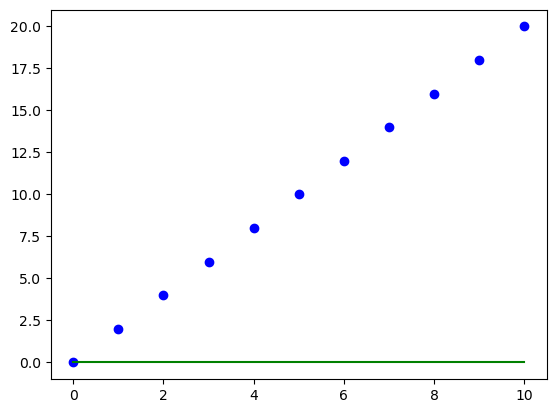

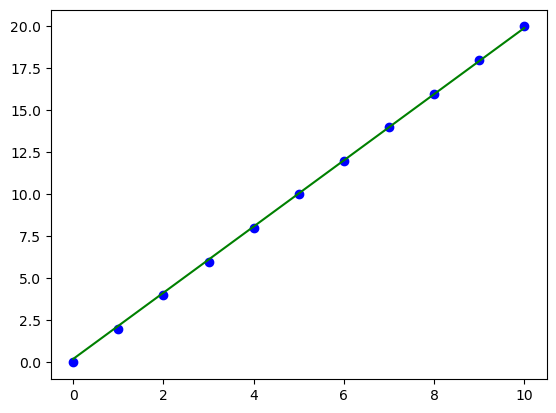

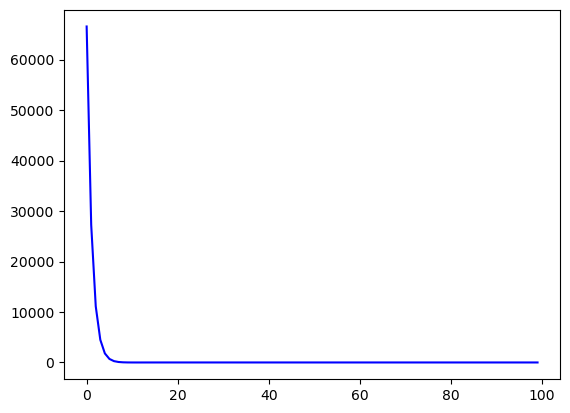

In [1]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]

	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
												np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
												np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X:
			X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred

	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	# def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
		f = plt.figure(fig)
		plt.scatter(self.X, self.Y, color='b')
		plt.plot(self.X, Y_pred, color='g')
		f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []

	# original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)

		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	# final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	# plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])


if __name__ == '__main__':
	main()
